In [1]:
# Import all the libraries
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
pd.set_option('display.max_columns', None)
import glob
import datetime
import os
import json
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Constants
DATA_FOLDER = 'data/'
META_FOLDER = DATA_FOLDER + 'meta/'
N_REVIEW_THRESHOLD = 20

In [3]:
# Load data and metadata
def load_one_file(path):
    with open(path) as f:
        return [json.loads(line) for line in f]

def load_one_meta_file(path):
    with open(path) as f:
        return [eval(line) for line in f]

data_files = glob.glob(DATA_FOLDER + 'part-000*')
data = sum(map(load_one_file, data_files), [])

meta_files = glob.glob(META_FOLDER + '*')
meta = sum(map(load_one_meta_file, meta_files), [])

df = pd.DataFrame(data)
meta_df = pd.DataFrame(meta)

In [4]:
meta_df.head()

,asin,brand,categories,description,imUrl,price,related,salesRank,title
0,0002000253,NaN,[[Books]],NaN,http://ecx.images-amazon.com/images/I/414DA797...,NaN,NaN,{'Books': 4746071},Thunder through my veins: Memories of a Metis ...
1,0002008572,NaN,[[Books]],NaN,http://ecx.images-amazon.com/images/I/41PjujqM...,14.37,"{'also_bought': ['B00IXWIFR2', '189497476X', '...",{'Books': 1756919},GOLD DIGGERS~STRIKING IT RICH IN THE KLONDIKE
2,0002172747,NaN,[[Books]],NaN,http://ecx.images-amazon.com/images/I/91momVNl...,2.99,"{'also_bought': ['1558175326', '0002172763', '...",{'Books': 4763210},The Ghost Walker
3,0002007770,NaN,[[Books]],NaN,http://ecx.images-amazon.com/images/I/511VYFJM...,8.52,"{'also_bought': ['0399155341', '1573222453', '...",{'Books': 2296729},Water For Elephants
4,0002247399,NaN,[[Books]],NaN,http://ecx.images-amazon.com/images/I/51Lp8zDj...,4.99,"{'also_bought': ['0553801503', '0553106635', '...",{'Books': 813739},A Dance with Dragons


In [36]:
meta_df.categories.astype('str').unique()

array(["[['Books']]", "[['Movies & TV', 'TV']]", 'nan', ...,
       "[['Books', 'Literature & Fiction'], ['Books', 'Romance', 'Contemporary'], ['Books', 'Romance', 'Military'], ['Kindle Store', 'Kindle eBooks', 'Romance', 'Contemporary'], ['Kindle Store', 'Kindle eBooks', 'Romance', 'Military']]",
       '[[\'Books\', \'Literature & Fiction\', "Women\'s Fiction", \'Contemporary Women\'], [\'Books\', \'Romance\', \'Contemporary\'], [\'Books\', \'Romance\', \'Military\'], [\'Books\', \'Romance\', \'Multicultural\'], [\'Books\', \'Romance\', \'New Adult & College\'], [\'Books\', \'Romance\', \'Romantic Comedy\'], [\'Kindle Store\', \'Kindle Short Reads\', \'Two hours or more (65-100 pages)\', \'Romance\'], [\'Kindle Store\', \'Kindle eBooks\', \'Literature & Fiction\', \'Contemporary Fiction\', "Women\'s Fiction"], [\'Kindle Store\', \'Kindle eBooks\', \'Literature & Fiction\', "Women\'s Fiction", \'New Adult & College\'], [\'Kindle Store\', \'Kindle eBooks\', \'Literature & Fiction\', "W

In [5]:
joined = pd.merge(df, meta_df, how='inner')
joined['reviewTime'] = pd.to_datetime(joined.unixReviewTime, unit='s')
joined['reviewMonth'] = joined.reviewTime.map(lambda t: t.month)

In [6]:
joined.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,brand,categories,description,imUrl,price,related,salesRank,title,reviewMonth
0,B005FYPK9C,"[0, 0]",5.0,I was sketchy at first about these but once yo...,2013-01-08,A000008615DZQRRI946FO,mj waldon,great buy,1357603200,NaN,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",NaN,http://ecx.images-amazon.com/images/I/415OJXEA...,NaN,"{'also_bought': ['B004KNWSBM', 'B00CIM6I8G', '...",{'Shoes': 53868},Osiris Men's Cinux Skate Shoe,1
1,0871714779,"[0, 0]",1.0,"Because I have not gotten the book yet, I may ...",2013-05-22,A000096625CHSNKYTYGZN,Melody L Fearn,I Have Not Got It Yet.,1369180800,NaN,[[Books]],NaN,http://ecx.images-amazon.com/images/I/61fWm4Vm...,NaN,{'buy_after_viewing': ['0871711605']},{'Books': 3814395},Welding Inspection Technology; workbook AWS WIT-W,5
2,B00E7OIOVC,"[0, 0]",5.0,Great!,2014-07-03,A0001528BGUBOEVR6T5U,igozingo,Five Stars,1404345600,niceEshop,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Style flask funnel great to help you fill your...,http://ecx.images-amazon.com/images/I/31gMKQdA...,1.99,"{'also_bought': ['B004TQIB7U', 'B006O1EBHW', '...",{'Kitchen & Dining': 63021},niceEshop(TM) Small Stainless Steel Funnel For...,7
3,B00EXOZ9W8,"[0, 0]",5.0,"My man was more then happy with it, looking fo...",2014-07-02,A00030342K9JCQO8Q7C3L,Joseph Dvorak,Five Stars,1404259200,NaN,"[[Home & Kitchen, Kitchen & Dining, Small Appl...",,http://ecx.images-amazon.com/images/I/41Oc0HaP...,65.81,"{'also_bought': ['B000FAJ0K6', 'B0012UY6XO', '...",{'Kitchen & Dining': 56153},BELLA 14025 Programmable Slow Cooker with Lock...,7
4,1477473939,"[0, 0]",4.0,Reading this seriers was a amazing. It was ver...,2013-01-26,A000443821AD43TOGKNGZ,Uluwehi,Really enjoyed it!,1359158400,NaN,[[Books]],USA Today Best Selling Author Elizabeth Reyes...,http://ecx.images-amazon.com/images/I/51bhuPCO...,4.99,"{'also_bought': ['147522186X', '1475244207', '...",{'Books': 1011147},Making You Mine: The Moreno Brothers,1


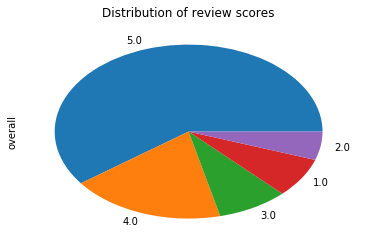

In [7]:
joined.overall.value_counts().plot(kind='pie', title='Distribution of review scores')

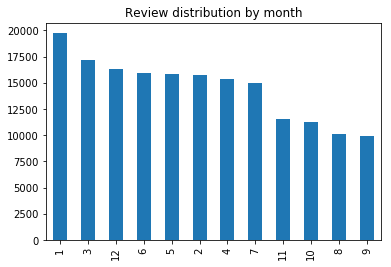

In [34]:
joined.reviewMonth.value_counts().plot(kind='bar', title='Review distribution by month')

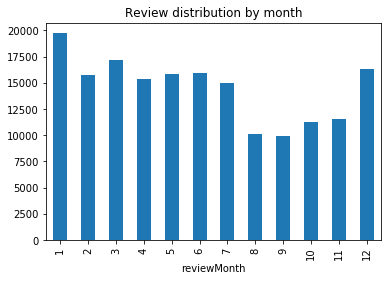

In [32]:
joined.groupby('reviewMonth')\
      .count()\
      .overall\
      .plot(kind='bar', title='Review distribution by month')

In [9]:
price_bins = [
    0,
    10,
    20,
    30,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    200,
    500,
    1000
]

In [10]:
no_nan_price = joined.dropna(axis=0, subset=['price'])
no_nan_price = no_nan_price[no_nan_price.price != 0]
group_by_price_tier = no_nan_price.groupby(pd.cut(no_nan_price.price, price_bins))

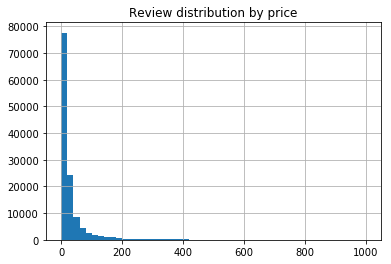

In [11]:
ax = plt.subplot()
no_nan_price.price.hist(bins=50, ax=ax)
ax.set_title('Review distribution by price')

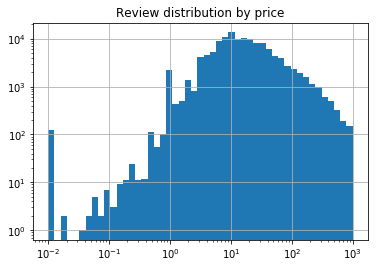

In [12]:
log_bins = np.logspace(np.log10(min(no_nan_price.price)), np.log10(max(no_nan_price.price)), 50)
ax = plt.subplot()
ax.set_title('Price')
no_nan_price.price.hist(ax=ax, log=True, bins=log_bins)
ax.set_xscale('log')
ax.set_title('Review distribution by price')

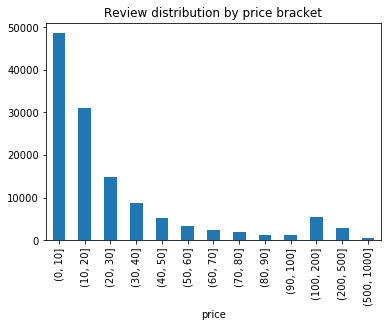

In [13]:
group_by_price_tier.asin.count().plot(kind='bar', title='Review distribution by price bracket')

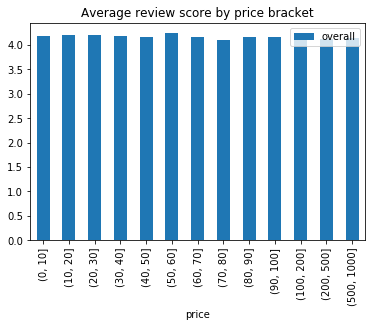

In [14]:
group_by_price_tier[['overall']].mean().plot(kind='bar', title='Average review score by price bracket')

In [15]:
group_by_month = joined.groupby('reviewMonth')
average_month = group_by_month.overall

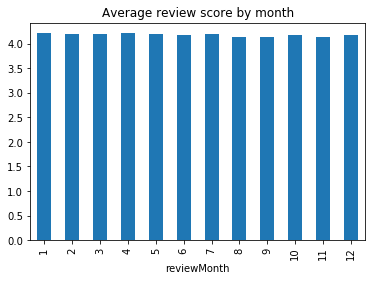

In [16]:
average_month.mean().plot(kind='bar', title='Average review score by month')

In [17]:
cats = [r[0][0] for r in joined.categories]

TypeError: 'float' object is not subscriptable

In [37]:
# Create dataframe with needed information
product_reviews = pd.DataFrame({'productID': df.asin,
                                'rating': df.overall,
                                'time': pd.to_datetime(df.reviewTime, format='%m %d, %Y')
                                })
product_reviews['month'] = product_reviews.time.map(lambda t: t.month)
product_reviews.set_index('productID', drop=True, inplace=True)
product_reviews.head()

,rating,time,month
productID,,,
B005FYPK9C,5.0,2013-01-08,1
0871714779,1.0,2013-05-22,5
B00E7OIOVC,5.0,2014-07-03,7
B00EXOZ9W8,5.0,2014-07-02,7
B000G2OYOU,5.0,2012-11-20,11


In [38]:
# Create a product by month table to spot periodicity
# Each entry is the mean of ratings the product gets within certain month
# Nans are filled with 0
product_month = product_reviews.pivot_table(values='rating',
                                            index=product_reviews.index,
                                            columns='month',
                                            fill_value=0)

# Select products with number of reviews larger than the threshold
review_count = product_reviews.index.value_counts()
product_month = product_month.loc[review_count>N_REVIEW_THRESHOLD]

product_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
productID,,,,,,,,,,,,
006202406X,3.500000,3.000000,3.2,4.000000,0.0,3.333333,0.0,0.0,0.00,3.000000,3.750000,2.0
006228648X,3.000000,0.000000,1.0,2.333333,4.5,1.500000,0.0,0.0,0.00,2.500000,3.166667,3.0
030758836X,3.777778,4.000000,2.0,3.000000,3.0,3.666667,4.0,3.0,3.60,3.000000,3.800000,2.5
0307588378,4.666667,4.000000,5.0,0.000000,4.0,4.000000,1.0,5.0,4.25,2.666667,2.500000,3.0
038536315X,4.400000,4.666667,3.0,4.500000,5.0,0.000000,0.0,0.0,0.00,0.000000,3.500000,4.0


In [81]:
# Measure anolimity/eveness, higher is more even
def entropy(x):
    if (x==0).any():
        return 0
    nx = x/x.sum()
    return -(nx*np.log(nx)).sum()
def GMAM(x):
#     if (x==0).any():
#         return None
    return np.power(x.prod(), 1/len(x))/x.mean()

In [86]:
entropy(np.array([1]*5)), entropy(np.array([1,2,3,4,5])), entropy(np.array([1,1,1,1,5]))

(1.6094379124341005, 1.4897503188505912, 1.3030924037617191)

In [87]:
GMAM(np.array([1]*5)), GMAM(np.array([1,2,3,4,5])), GMAM(np.array([1,1,1,1,5]))

(1.0, 0.86839036156578409, 0.76651647858956384)

In [85]:
product_month['entropy'] = product_month.apply(entropy, axis=1)
product_month['GMAM'] = product_month.apply(GMAM, axis=1)
product_month.sort_values(by='entropy', inplace=True, ascending=False)
product_month.head(30)
# product_month.apply(entropy, axis=1).head(30)

month,1,2,3,4,5,6,7,8,9,10,11,12,entropy,GMAM
productID,,,,,,,,,,,,,,
030758836X,3.777778,4.000000,2.000000,3.000000,3.000000,3.666667,4.0,3.000000,3.600000,3.000000,3.800000,2.500000,2.596366,0.947672
B004LLILBY,4.866667,5.000000,5.000000,5.000000,5.000000,4.875000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,2.593639,0.932925
B004KNWWQ8,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,4.500000,4.000000,5.000000,4.500000,4.500000,2.593397,0.934205
B00B7805QS,4.750000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,4.000000,5.000000,2.592869,0.932851
B007XZL7PC,5.000000,5.000000,5.000000,4.500000,4.500000,5.000000,5.0,3.333333,4.000000,4.333333,4.000000,4.000000,2.592076,0.935515
B004KNWWPY,4.733333,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,3.000000,5.000000,5.000000,5.000000,5.000000,2.588129,0.928519
B004LLILBO,4.500000,4.750000,4.833333,5.000000,2.500000,5.000000,5.0,5.000000,4.666667,5.000000,5.000000,4.857143,2.584927,0.925727
B001KXZ808,3.500000,5.000000,5.000000,5.000000,4.600000,4.500000,5.0,1.000000,5.000000,5.000000,4.000000,5.000000,2.556913,0.887926
B005SUHR6C,4.666667,3.666667,5.000000,5.000000,5.000000,3.500000,5.0,1.000000,4.500000,4.000000,3.000000,4.666667,2.556114,0.891540


In [ ]:
# Audiobook, fifty shades of grey
meta_df.loc[meta_df.asin=='B007TNUULA'].iloc[0,:]

In [ ]:
grey = product_reviews.loc['B007TNUULA'].sort_values(by='time')
for index in range(grey.shape[0]):
    row = grey.iloc[index]
    print(row.iloc[[0,1,2,5,6]])
    print(row.iloc[3])
    print(row.iloc[4])

## ToDo: Spot/measure the periodicity (automatically)